<a href="https://colab.research.google.com/github/henrique-rsilva/nasacovid19/blob/feature%2Fai_model/NASA_COVID19_TrainIssueDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize

In [0]:
!pip install transformers

In [0]:
from transformers import BertTokenizer, BertModel
import torch

from sklearn.neural_network import MLPClassifier

from glob import glob

from tqdm import tqdm_notebook as tqdm

# Load training data

In [0]:
sentences = []
classes = []

for filename in glob('*csv'):

  fp = open(filename)

  for sentence in fp:
    sentences.append(sentence.lower().strip())
    classes.append(filename.split('.')[0])

  fp.close()

In [0]:
len(classes)

149

# Initialize BERT

In [0]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [0]:
X = []

for sentence in tqdm(sentences):
    input_ids = torch.tensor(tokenizer.encode(sentence.lower().strip(), add_special_tokens=True,max_length=512)).unsqueeze(0)  # Batch size 1
    outputs = model(input_ids)
    last_hidden_states = outputs[0] # The last hidden-state is the first element of the output tuple
    X.append(last_hidden_states[0,0,:].data.tolist()) # Get 'CLS' data


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


# Train model

In [0]:
mdl = MLPClassifier(max_iter=200)

mdl = mdl.fit(X,classes)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Test model

In [0]:
def classify(text):

  input_ids = torch.tensor(tokenizer.encode(text.lower().strip(), add_special_tokens=True,max_length=512)).unsqueeze(0)  # Batch size 1
  x = model(input_ids)[0][0,0,:].data.tolist()
  
  return mdl.predict([x,x])[0]

In [0]:
sentence = 'What do you want from me?.'

label = classify(sentence)

print(sentence, '->', label)

What do you want from me?. -> ok


# Classify new data

In [0]:
filename = 'IFTTT_Maker_Webhooks_Events.txt'

fp_in = open(filename)
fp_out = open('out_' + filename,'w')

for line in fp_in:

  label = classify(line.split(',')[5])
  fp_out.write(line.strip() + ', ' + label + '\n')

  print(line.split(',')[5], '->', label)

fp_in.close()
fp_out.close()

Good!! What about you? -> ok
bored -> ok
I have been nice -> leisure-bored
I'm sad -> leisure-bored
Okk -> ok
I don't want to say -> leisure-bored
Tired -> ok
Everything is ok -> ok
I am good -> ok
Not ok -> ok
Bored -> ok
Life is boring -> leisure-bored
I am doing ok -> ok
I am ok -> ok
I am not very good today -> sleep
A little bit tired -> leisure-bored
Tired of doing the same things -> leisure-bored
I have headache -> sleep
I am feeling well -> ok
Lonely -> leisure-bored
I miss my family -> leisure-bored
I am ok -> ok
I`m not so good -> ok
I miss my girlfriend -> leisure-bored
Normal -> ok
I am ok -> ok
Ok -> ok
I`ve been busy -> ok
"I`m not that good -> group-conflict
I have not slept very well last night -> sleep
Ok -> ok
I am feeling normal -> ok
I have been great -> ok
I am not ok -> leisure-bored
I am a little bit tired of working -> leisure-bored
I have been working a lot -> work-schedule
I am not sure -> ok
I have been listening to some music -> sleep
I have been alone in SP

In [0]:
fp_out = open('out_' + filename)

sentences = []
age = []
gender = []
labels = []

for line in fp_out:
  
  sentences.append(line.split(',')[5])
  age.append(int(line.split(',')[-3]))
  gender.append(line.split(',')[-2])
  labels.append('not ok' if line.split(',')[-1].strip() != 'ok' else 'ok')

fp_out.close()

In [0]:
for s,a,g,l in zip(sentences,age,gender,labels):
  print(g,'-',a,'-',l)

Female - 17 - ok
Female - 18 - ok
Female - 16 - not ok
Female - 16 - not ok
Male - 15 - ok
Male - 19 - not ok
male - 20 - ok
Male - 21 - ok
Female - 22 - ok
female - 29 - ok
Female - 29 - ok
Male - 22 - not ok
Female - 24 - ok
Female - 29 - ok
Male - 27 - not ok
male - 29 - not ok
Male - 16 - not ok
Female - 21 - not ok
female - 21 - ok
Female - 23 - not ok
Male - 24 - not ok
Male - 20 - ok
male - 26 - ok
Male - 29 - not ok
Female - 21 - ok
female - 20 - ok
Male - 16 - ok
Female - 27 - ok
Female - 30 - not ok
Male - 23 - not ok
Male - 19 - ok
Female - 19 - ok
Female - 24 - ok
Female - 24 - not ok
Male - 20 - not ok
Male - 18 - not ok
Female - 25 - ok
Male - 24 - not ok
Female - 25 - not ok
Female - 23 - not ok
Female - 26 - ok
Female - 17 - ok
Male - 25 - ok
Male - 24 - not ok
Female - 25 - not ok
Female - 25 - not ok
male - 27 - not ok
Male - 24 - ok
Female - 19 - ok
female - 20 - ok
Male - 18 - ok
Male - 26 - not ok
Female - 17 - not ok
Female - 17 - ok
Male - 24 - ok
Female - 23 - o

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
np.logical_and(np.array(gender) == 'Female', np.array(gender) == 'Male')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

(0.0, 4.0)

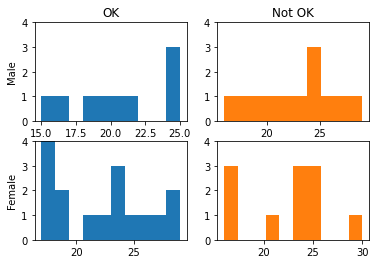

In [0]:
ax = plt.subplot(2,2,1)
plt.hist(np.array(age)[np.logical_and(np.array(labels) == 'ok', np.array(gender) == 'Male')])
plt.ylim([0,4])
plt.ylabel('Male')
plt.title('OK')
ax = plt.subplot(2,2,2)
plt.hist(np.array(age)[np.logical_and(np.array(labels) == 'not ok', np.array(gender) == 'Male')]);
plt.hist(np.array(age)[np.logical_and(np.array(labels) == 'not ok', np.array(gender) == 'Male')]);
plt.ylim([0,4])
plt.title('Not OK')

ax = plt.subplot(2,2,3)
plt.hist(np.array(age)[np.logical_and(np.array(labels) == 'ok', np.array(gender) == 'Female')])
plt.ylim([0,4])
plt.ylabel('Female')
ax = plt.subplot(2,2,4)
plt.hist(np.array(age)[np.logical_and(np.array(labels) == 'not ok', np.array(gender) == 'Female')]);
plt.hist(np.array(age)[np.logical_and(np.array(labels) == 'not ok', np.array(gender) == 'Female')]);
plt.ylim([0,4]);